# Assignment 3
## Part A (state diagrams and transition matrices)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

### This notebook is for sub-parts c, d, and e.

"Matrix approach"<br>
 * Generates the system via $P^{n+1}=P^nT$, or in our notation, $P_1=P_0T$
 * This is acheived with numpy's *dot* product function (inner product)
 * We collect the 'distribution', which is the set $D=[P_0, ..., P_n]$
 * This can be iterated arbitrarily, so we could implement a minimal difference, therefore the function stops when $||P_1-P_0|| < \epsilon$, but for later tests we need $n>=100$.

"Monte Carlo approach"
* Approximates the system by aggregating $N$ random walks through the system's state space, and analyzing the associated statistics
* This is acheived by 'moving' between states $s_0\rightarrow s_1$ according to $T$, meaning we update our 'state' based soley on the current state, and the transition matrix, via numpy's *choice* function, which allows custom probabilities
* We collect this 'trajectory' or set of 'movements' in $M=[s_0,...s_n]$
* Here, $n$ is again pre-defined, because we want to parameterize it later on.

In [2]:
def distribution(T, n=100):
    D = []
    P0 = np.zeros(len(T))
    P0[0] = 1
    for i in range(n):
        P1 = np.dot(P0, T)
        P0 = P1
        D.append(P0)
    return D

def trajectory(T, n=100):
    M = []
    s0 = np.zeros(len(T))
    s0[0] = 1
    for i in range(n):
        s1 = np.random.choice(range(len(T)), p=T[np.argmax(s0)])
        s0 = np.zeros(len(T))
        s0[s1] = 1
        M.append(s0)
    return M

In [3]:
T1 = [[0.2,0.2,0.2,0.2,0.2],
      [1.0,0.0,0.0,0.0,0.0],
      [0.5,0.0,0.5,0.0,0.0],
      [0.5,0.0,0.0,0.5,0.0],
      [0.5,0.0,0.0,0.0,0.5]]

T2 = [[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2],
      [1/3, 0.0, 1/3, 0.0, 0.0, 0.0, 1/3, 0.0, 0.0],
      [0.0, 0.0, 1/3, 0.0, 0.0, 2/3, 0.0, 0.0, 0.0],
      [0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.75, 0.0, 0.0],
      [0.3, 0.4, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, 0.0],
      [0.1, 0.0, 0.0, 0.0, 0.0, 0.9, 0.0, 0.0, 0.0],
      [0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2],
      [0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5],
      [0.0, 0.3, 0.0, 0.05, 0.05, 0.0, 0.3, 0.2, 0.1]]

Re-run notebook with $T_1$ or $T_2$ here $\rightarrow$

In [4]:
T = T1 #T2
base = len(T)
D = distribution(T)
M = trajectory(T)[:len(D)]

Above we've made use of the first transition matrix $T_1$.
We've also collected the corresponding distribution $D$ and one possible trajectory in $M$ and plotted them both below. <br>

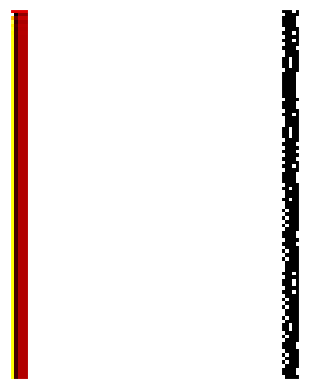

In [5]:
plt.rcParams['figure.facecolor'] = 'None'
plt.rcParams['axes.facecolor'] = 'None'
fig, ax = plt.subplots(1,2, sharex=True, sharey=True)
ax[0].imshow(D, cmap='hot')
ax[1].imshow(M, cmap='gray')
plt.xticks([]); plt.yticks([])
plt.show()

Now we investigate how we can approximate the distribution after a given number of iterations or 'events' <br>$(5, 10, 100)$, by averaging many trajectories. Of course we cannot expect the random Markovian process to approximate the true distribution at these points unless we iterate and average the random walks -- this is why we have set $N>>1$. You can see for yourself lowering $N$ destroys the predictive relation with further events.

In [6]:
def plotStates(title, d, m):
    plt.figure(figsize=(3,3))
    plt.scatter(states, m, color='b', edgecolor='w', zorder=2)
    plt.scatter(states, d, color='w', marker='x', zorder=3)
    RSS = np.sum([(d[i]-m[i])**2 for i in range(base)])
    plt.title(title+ ', RSS = '+str(np.round(RSS, 4)))
    plt.xticks(states); plt.grid(ls=':', alpha=0.5, zorder=1)
    plt.xlabel('states'); plt.ylabel('probability')
    plt.show()

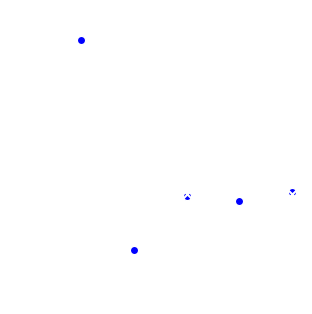

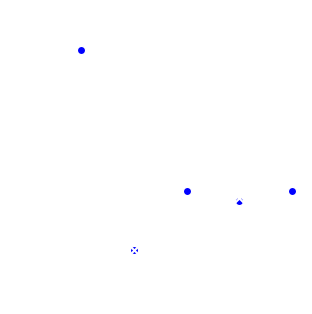

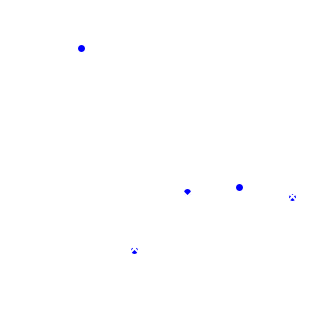

In [7]:
N = 1000
states = np.arange(base)
events = [5, 10, 100]
for event in events:
    De = D[event-1]
    Ms = [[t for t in trajectory(T)][event-1] for i in range(N)]
    Me = np.mean(Ms, axis=0)
    title = 'Event = '+str(event)
    plotStates(title, De, Me)

Here it's important to point out that there's no apriori reason to assume the Monte Carlo averages will better approximate event $n$ vs event $n+m$, assuming we have the same number of trajectories $N$.<br>

That's because it depends on how quickly the system enters a steady-state, if it does so at all. We *can* however assume that the Monte Carlo averages can better predict the actual distribution if we know we are within or close to the steady state. This is because the steady-state will sharpen the probability distribution (and sharper distributions are easier to predict). However, since looking at the first plot it's obvious we're well into the steady state after 5-10 iterations, so events 5, 10, and 100 should not be expected to show a monotonic predictive performance relation. <br>

A better test of principle would be to test the final state -- when the distribution fails to change significantly between subsequent iterations, specifically the Monte Carlo average's ability to predict this final state as a function of $N$. This is what we show below.

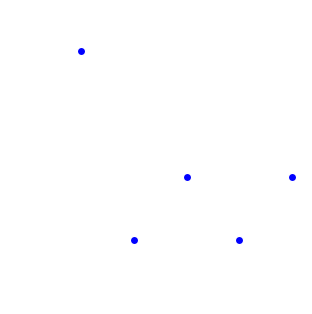

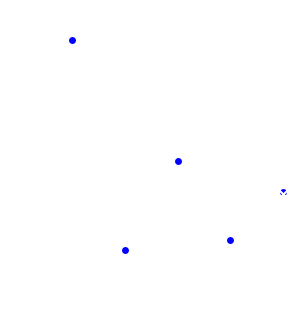

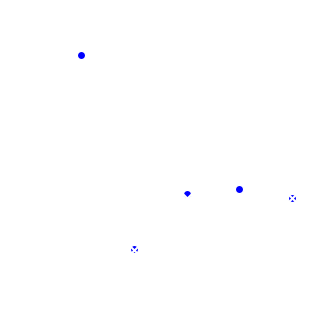

In [8]:
#get the steady-state index
ss = 0
for i in range(len(D)-1):
    diff = np.linalg.norm(D[i+1]-D[i])
    if diff < 1e-6:
        ss = i
assert ss>0, 'failed to find steady-state'

#plot the distributions and means
Dss = D[ss]
for N in [10, 100, 1000]:
    Ms = [[t for t in trajectory(T)][ss] for i in range(N)]
    Me = np.mean(Ms, axis=0)
    title = 'N = '+str(N)
    plotStates(title, Dss, Me)

Now, no matter how many times you run it, the average Monte Carlo trajectories will better approximate the true distribution as a function of $N$.